My first Kaggle -  Project submission :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('../input/titanic/train.csv')

In [3]:
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
all_data = [train, test]

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape, test.shape

((891, 12), (418, 11))

In [8]:
pd.set_option('display.max_row',None) 
pd.set_option('display.max.column', None)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#  Data Exploration 

> **Sex**

In [10]:
train.groupby('Sex')[['Sex','Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
pd.crosstab(train.Sex, train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived          0          1
Sex                           
female     9.090909  26.150393
male      52.525253  12.233446


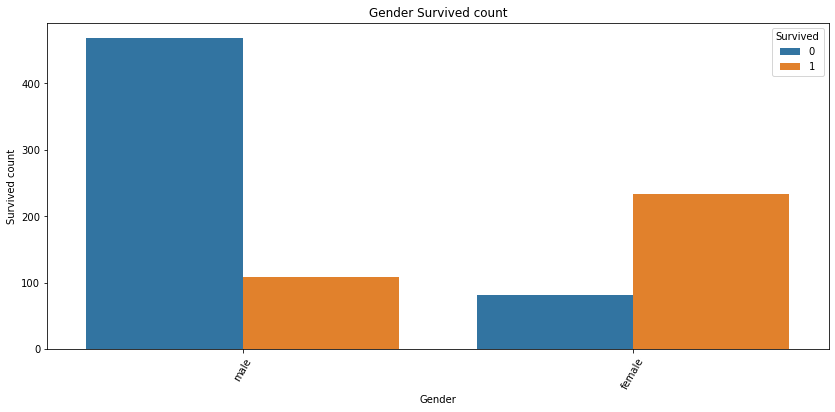

In [12]:
print(pd.crosstab(train.Sex, train.Survived) / train.shape[0]*100)

plt.figure(figsize=(14,6))
sns.countplot(data = train, hue = 'Survived', x='Sex')
plt.xlabel('Gender')
plt.ylabel('Survived count')
plt.xticks(rotation=60)
plt.title('Gender Survived count')
plt.show()

In [13]:
train.Sex.value_counts() / train.shape[0] * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In the total 35 % female in the titanic ship 26 % of female have survived. <br> So the probability of female surived
in the titanic ship is very high

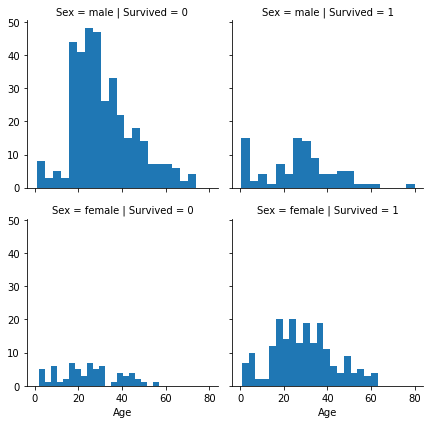

In [14]:
grid = sns.FacetGrid(train, col = 'Survived', row = 'Sex')
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()

> **PClass**

In [15]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


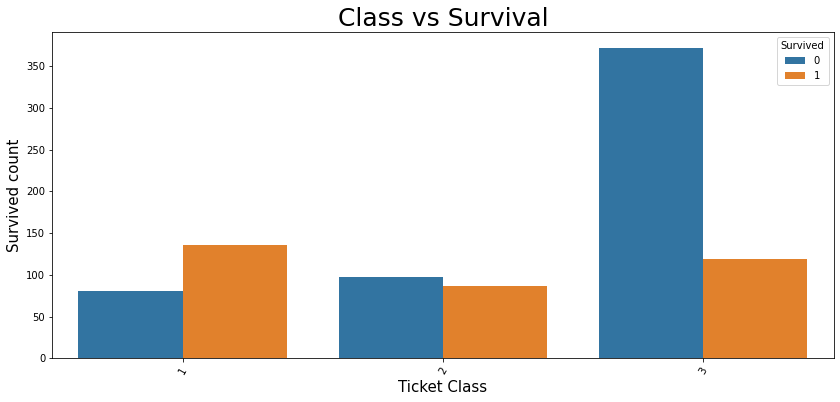

In [16]:
### Lets see the visualization of Pclass to the survived with respect to Age distribution 
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
plt.figure(figsize=(14,6))
sns.countplot(data = train, x = 'Pclass', hue='Survived')
plt.xlabel('Ticket Class', fontsize = 15)
plt.ylabel('Survived count', fontsize = 15)
plt.title('Class vs Survival', fontsize = 25)
plt.xticks(rotation = 60)
plt.show()

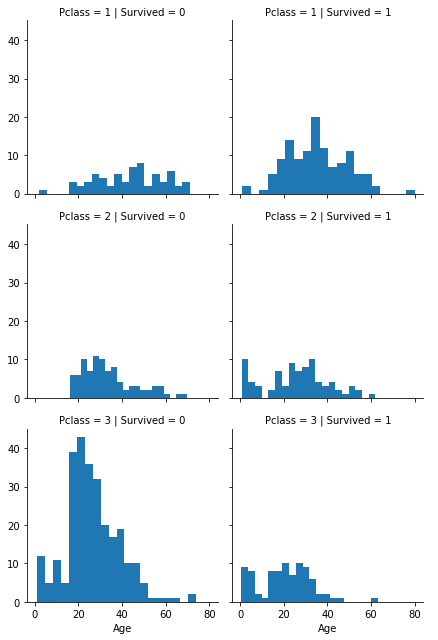

In [17]:
grid = sns.FacetGrid(train, col='Survived', row = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend();

3rd class passengers with age group ~ 25 - 35 have high probability not to survive


# **SibSp and Parch**

- Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

- We are going to create new variable family_size by adding Sibsp and Parch

In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.shape, test.shape

((891, 12), (418, 11))

In [20]:
all_data = [train, test]

In [21]:
for dataset in all_data:
    dataset['Familysize'] = dataset["SibSp"] + dataset["Parch"] + 1
print(train[['Familysize','Survived']].groupby(['Familysize'],as_index=False).mean())

   Familysize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Survived      0    1
Familysize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


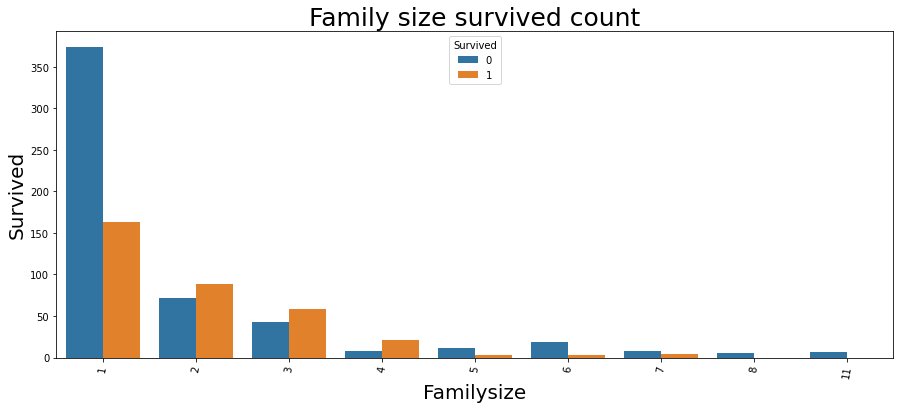

In [22]:
print(pd.crosstab(train.Familysize, train.Survived))

plt.figure(figsize=(15,6))
sns.countplot(x = 'Familysize', hue = 'Survived', data = train)
plt.xlabel('Familysize', fontsize = 20)
plt.ylabel('Survived', fontsize = 20)
plt.title('Family size survived count', fontsize = 25)
plt.xticks(rotation = 80)
plt.show()

Family size with 4 have the maximum probability with survival

In [23]:
### since familysize variable is created lets drop SibSp and Parch varaible

In [24]:
train.head()
train.drop(labels= ['SibSp','Parch'], axis=1, inplace = True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [26]:
test = test.drop(labels=['SibSp','Parch'], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Familysize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,3


In [27]:
all_data = [train, test]

# **Age**

<Figure size 1080x432 with 0 Axes>

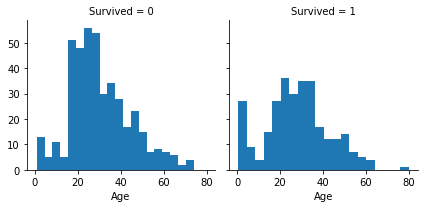

In [28]:
plt.figure(figsize=(15,6))
grid = sns.FacetGrid(train, col = 'Survived')
grid.map(plt.hist, 'Age', bins = 20)
plt.show()

From the visalisation it is seen that age group below 5 have more survival rate Age group between 15 - 25 have low survival rate

# **Embarked**

In [29]:
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [30]:
print(pd.crosstab(train.Embarked, train.Survived))

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


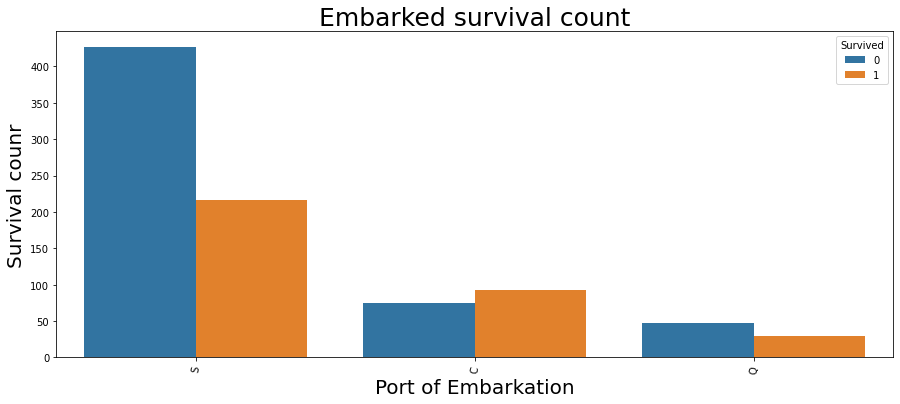

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.xlabel('Port of Embarkation', fontsize = 20)
plt.ylabel("Survival counr", fontsize = 20)
plt.title('Embarked survival count', fontsize = 25)
plt.xticks(rotation = 80)
plt.show()

#  **Missing value inputation and data cleaning**

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [33]:
train.isnull().sum()[train.isnull().any()]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [34]:
train.isnull().sum()[train.isnull().any()] / train.shape[0] * 100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [35]:
## lets drop the cabin from both the test and train data

In [36]:
train.drop(labels='Cabin', axis=1, inplace = True)

In [37]:
test.drop(labels='Cabin', axis=1, inplace = True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Familysize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,3


In [40]:
train.isnull().sum()[train.isnull().any()]

Age         177
Embarked      2
dtype: int64

In [41]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Familysize   891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [43]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Familysize   418 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [44]:
train.isnull().sum()[train.isnull().any()]

Embarked    2
dtype: int64

In [45]:
train['Embarked'] = train['Embarked'].fillna('S')

In [46]:
print(train.isnull().sum()[train.isnull().any()])

Series([], dtype: int64)


In [47]:
print(test.isnull().sum()[test.isnull().any()])

Fare    1
dtype: int64


In [48]:
test.isnull().sum()[test.isnull().any()]

Fare    1
dtype: int64

In [49]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [50]:
test.isnull().sum()[test.isnull().any()]

Series([], dtype: int64)

In [51]:
train['Ticket'].nunique() / train.shape[0] * 100

76.43097643097643

76 percentage of Ticket data are unique ones which i feel does not give any further value to the dataset Lets drop 'Ticket' from both test and train dataset

In [52]:
train.drop(labels='Ticket', axis=1, inplace = True)

In [53]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Familysize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,3


**Lets work on the Name variable and create a new variable called Title**

In [54]:
all_data = [train,  test]

In [55]:
for dataset in all_data:
    dataset['title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [56]:
pd.crosstab(train.title, train.Sex)

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [57]:
for dataset in all_data:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [58]:
print(train[['title','Survived']].groupby(['title'], as_index=False).mean())

    title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


Survived    0    1
title             
Master     17   23
Miss       55  130
Mr        436   81
Mrs        26  100
Rare       15    8


Text(0.5, 1.0, 'Title vs Survived')

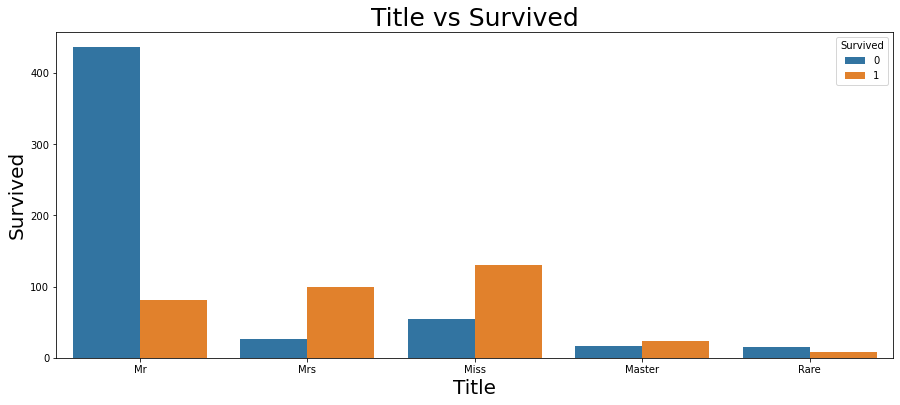

In [59]:
print(pd.crosstab(train.title, train.Survived))
plt.figure(figsize = (15,6))
sns.countplot(x = 'title', data = train, hue = 'Survived')
plt.xlabel('Title', fontsize = 20)
plt.ylabel ('Survived', fontsize = 20)
plt.title('Title vs Survived', fontsize = 25)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Familysize   891 non-null    int64  
 9   title        891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Familysize   418 non-null    int64  
 9   title        418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [62]:
#lets drop Name from both datasets

In [63]:
train.drop(labels='Name', axis=1, inplace=True)

In [64]:
test.drop(labels='Name', axis=1, inplace = True)

In [65]:
varsll_data = [train, test]

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Familysize   891 non-null    int64  
 8   title        891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Ticket       418 non-null    object 
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Familysize   418 non-null    int64  
 8   title        418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


**Notes:**
- We can create a new column named AgeState

- Map the categorical datas with values

In [68]:
train["AgeState"] = pd.cut(train.Age, bins = [0, 2, 5, 18,60,100], labels=["Infant", "Toddler", "Child", "Adult", 'Senior_Citizen'],include_lowest=True)

In [69]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,title,AgeState
0,1,0,3,male,22.0,7.2500,S,2,Mr,Adult
1,2,1,1,female,38.0,71.2833,C,2,Mrs,Adult
2,3,1,3,female,26.0,7.9250,S,1,Miss,Adult
3,4,1,1,female,35.0,53.1000,S,2,Mrs,Adult
4,5,0,3,male,35.0,8.0500,S,1,Mr,Adult


In [70]:
test["AgeState"] = pd.cut(test.Age, bins = [0, 2, 5, 18,60,100], labels=["Infant", "Toddler", "Child", "Adult", 'Senior_Citizen'],include_lowest=True)

In [71]:
train.AgeState.value_counts()

Adult             730
Child              95
Infant             24
Senior_Citizen     22
Toddler            20
Name: AgeState, dtype: int64

Survived          0    1
AgeState                
Infant            9   15
Toddler           4   16
Child            56   39
Adult           463  267
Senior_Citizen   17    5


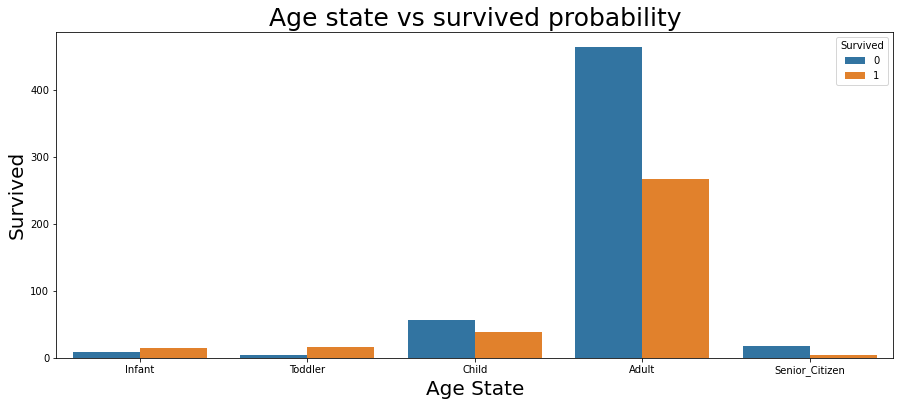

In [72]:
print(pd.crosstab(train.AgeState, train.Survived))
plt.figure(figsize=(15,6))
sns.countplot(x = 'AgeState', hue = 'Survived', data = train)
plt.xlabel('Age State', fontsize = 20)
plt.ylabel('Survived', fontsize = 20)
plt.title('Age state vs survived probability', fontsize = 25)
plt.show()

- 0 - 5 age group i.e infants and toddler have the greatest survival probability
- Lets drop the "Age" variable from both train and test dataset

In [73]:
train.drop(labels='Age', axis = 1, inplace = True)

In [74]:
test.drop(labels='Age', axis = 1, inplace = True)

In [75]:
all_data = [train, test]

Lets map the categorical with some values (Encoding)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    object  
 6   Familysize   891 non-null    int64   
 7   title        891 non-null    object  
 8   AgeState     891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 56.9+ KB


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Ticket       418 non-null    object  
 4   Fare         418 non-null    float64 
 5   Embarked     418 non-null    object  
 6   Familysize   418 non-null    int64   
 7   title        418 non-null    object  
 8   AgeState     418 non-null    category
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 26.9+ KB


In [78]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [79]:
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1}).astype('int64')

In [80]:
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    object  
 6   Familysize   891 non-null    int64   
 7   title        891 non-null    object  
 8   AgeState     891 non-null    category
dtypes: category(1), float64(1), int64(5), object(2)
memory usage: 56.9+ KB


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Ticket       418 non-null    object  
 4   Fare         418 non-null    float64 
 5   Embarked     418 non-null    object  
 6   Familysize   418 non-null    int64   
 7   title        418 non-null    object  
 8   AgeState     418 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 26.9+ KB


In [83]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
    all_data = [train, test]

In [85]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype('int64')

In [86]:
all_data = [train, test]

In [87]:
train.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [88]:
test.Embarked.value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [89]:
train.title.value_counts()


Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: title, dtype: int64

In [90]:
for dataset in all_data:
    dataset['title'] = dataset['title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4}).astype('int64')

In [91]:
train.title.value_counts()

0    517
1    185
2    126
3     40
4     23
Name: title, dtype: int64

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    int64   
 6   Familysize   891 non-null    int64   
 7   title        891 non-null    int64   
 8   AgeState     891 non-null    category
dtypes: category(1), float64(1), int64(7)
memory usage: 56.9 KB


In [93]:
all_data = [train, test]

In [94]:
train.AgeState.value_counts()

Adult             730
Child              95
Infant             24
Senior_Citizen     22
Toddler            20
Name: AgeState, dtype: int64

In [95]:
for dataset in all_data:
    dataset['AgeState'] = dataset['AgeState'].map({'Adult':0,'Child':1,'Infant':2,
                                                  'Senior_Citizen':3,'Toddler':4}).astype('int64')

In [96]:
train.AgeState.value_counts()

0    730
1     95
2     24
3     22
4     20
Name: AgeState, dtype: int64

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Familysize   891 non-null    int64  
 7   title        891 non-null    int64  
 8   AgeState     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Ticket       418 non-null    object 
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Familysize   418 non-null    int64  
 7   title        418 non-null    int64  
 8   AgeState     418 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 29.5+ KB


In [99]:
###Passengerid wont be significant for model building so lets drop them

In [100]:
train.drop(labels='PassengerId', axis=1, inplace=True)

# Model building

In [101]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [102]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import  train_test_split

In [103]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
X_test_data = test.drop('PassengerId', axis = 1).copy()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 10)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [106]:
from sklearn.model_selection import GridSearchCV

**LogisticRegression**

In [107]:
logre = LogisticRegression()
logre.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred = logre.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1])

In [109]:
print(accuracy_score(y_pred, y_test) *100)

84.30493273542601


In [110]:
y_pred_train = logre.predict(X_train)
print(accuracy_score(y_pred_train, y_train) *100)

77.84431137724552


**Decision tree**

In [111]:
dtree = DecisionTreeClassifier()

In [112]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6]
}

In [113]:
grid = GridSearchCV(estimator = dtree, param_grid=param_grid, n_jobs=-1)

In [114]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6]})

In [115]:
dtree = grid.best_estimator_

In [116]:
y_pred = dtree.predict(X_test)
print(accuracy_score(y_pred, y_test)*100)

84.30493273542601


In [117]:
y_pred_train = dtree.predict(X_train)
print(accuracy_score(y_pred_train, y_train)*100)

86.67664670658682


**Randomforestclassifier**

In [118]:
param_grid = {
    'n_estimators':[200,150,100,50],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6]
}

In [119]:
rf = RandomForestClassifier()

In [120]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

In [121]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [200, 150, 100, 50]})

In [122]:
rf = grid.best_estimator_

In [123]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8565022421524664


In [124]:
y_pred_train = rf.predict(X_train)
print(accuracy_score(y_pred_train, y_train))

0.8577844311377245


**xgboost**

I have tried Xgboost in my local jupyter notebook.
- The test accuracy is 85 %
- The train accuracy is 91 %

lets go with random forest classifier as there is no variation in the test and train data accuracy 

In [125]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(criterion='entropy', max_depth=6)

In [126]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))
y_train_pre = rf.predict(X_train)
print(accuracy_score(y_train_pre, y_train))

0.8565022421524664
0.8607784431137725


In [127]:
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82089552 0.82089552 0.86567164 0.8358209  0.76119403 0.80597015
 0.80597015 0.86567164 0.84848485 0.87878788]
Mean: 0.8309362279511532
Standard Deviation: 0.033685172406136894


In [128]:
print("Accuracy_score", accuracy_score(y_train_pre, y_train))
print("Mean:", scores.mean())
print("Variation:", scores.var())

Accuracy_score 0.8607784431137725
Mean: 0.8309362279511532
Variation: 0.0011346908400311664


In [129]:
X_test_data.drop(labels='Ticket', axis=1,inplace = True)

In [130]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Fare        418 non-null    float64
 3   Embarked    418 non-null    int64  
 4   Familysize  418 non-null    int64  
 5   title       418 non-null    int64  
 6   AgeState    418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [131]:
y_preds_test = rf.predict(X_test_data)

In [132]:
y_preds_test.shape

(418,)

The business can find the varaition in the data by 0.00094

In [133]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})

In [134]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.242
title,0.216
Fare,0.207
Familysize,0.132
Pclass,0.126
AgeState,0.046
Embarked,0.032


<AxesSubplot:xlabel='feature'>

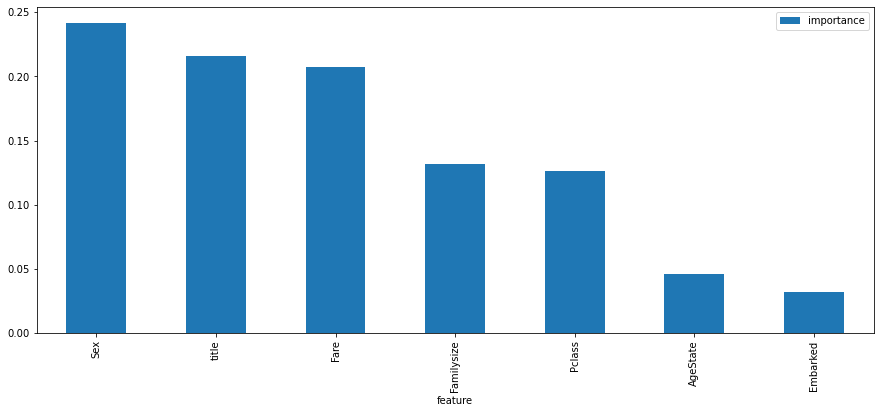

In [135]:
importances.plot(kind='bar',figsize=(15,6))

Title have a huge impact in Survival

In [136]:
my_submission_titanic = pd.DataFrame({'Passengerid':test['PassengerId'],
                                     'Survived':y_preds_test})

In [137]:
my_submission_titanic.head()

,Passengerid,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [138]:
my_submission_titanic.to_csv("./Prasanna_submission.csv", index=False)